# DATA Analysis

In [2]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
import array
import math

In [3]:
rho_vs_J_v_x = pd.read_csv("rho_vs_J_v_x0_mean_v_x1_mean_L100.csv")
rho_vs_J_v_y = pd.read_csv("rho_vs_J_v_y0_mean_v_y1_mean_L100.csv")

In [4]:
rho_vs_J_v_x.head(5)

,rho,J,v_x0_mean,v_x1_mean
0,0.02,0.019807,0.990316,0.990353
1,0.05,0.047995,0.959890,0.959901
2,0.10,0.090887,0.908873,0.908878
3,0.15,0.128797,0.858627,0.858627
4,0.20,0.161577,0.807887,0.807876


In [5]:
rho_vs_J_v_y.head(5)

,rho,J,v_y0_mean,v_y1_mean
0,0.02,0.019211,0.960914,0.960170
1,0.05,0.018035,0.901674,0.901839
2,0.10,0.016095,0.804834,0.804672
3,0.15,0.014136,0.706761,0.706823
4,0.20,0.012169,0.608514,0.608384


In [6]:
rho = rho_vs_J_v_x['rho']

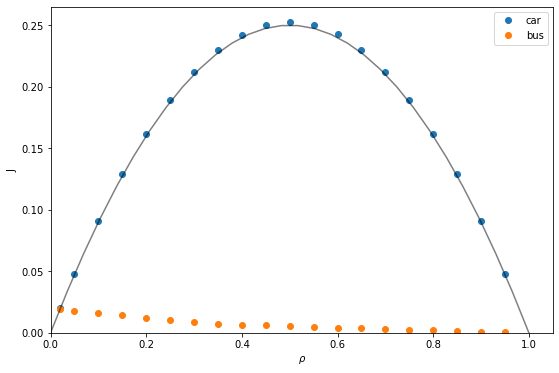

In [7]:
from cProfile import label
from turtle import color


plt.figure(figsize=(9,6))
plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['J'], linestyle='None', marker='o', label='car')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['J'], linestyle='None', marker='o', label='bus')
x=np.linspace(0,1,30)
plt.plot(x, x*(1-x), color='k', alpha=0.5)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')
plt.legend()

plt.show()

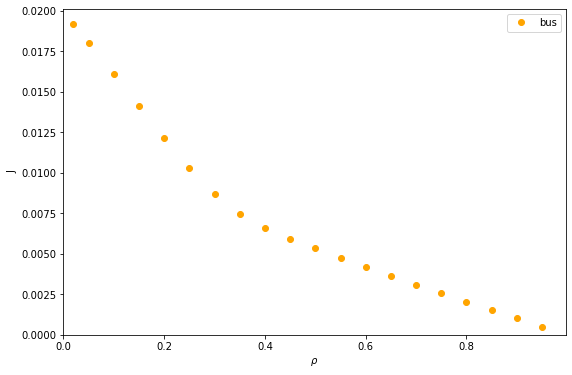

In [8]:
plt.figure(figsize=(9,6))
# plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['J'], linestyle='None', marker='o')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['J'], linestyle='None', marker='o', color='orange', label='bus')
x=np.linspace(0,1,30)

plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')
plt.legend()

plt.show()

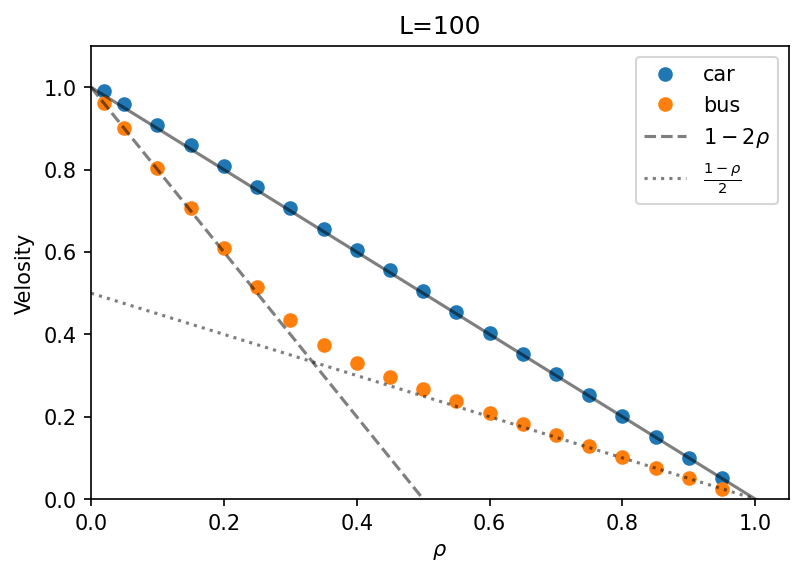

In [89]:
plt.figure(dpi=150)
plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['v_x0_mean'], linestyle='None', marker='o', label='car')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['v_y0_mean'], linestyle='None', marker='o', label='bus')
x=np.linspace(0,1,11)
plt.plot(x, 1-x, color='k', alpha=0.5)
plt.plot(x, 1-2*x, "--", color='k', alpha=0.5, label=r'$1-2\rho$')
plt.plot(x, (1-x)/2, ":", color='k', alpha=0.5, label=r'$\frac{1-\rho}{2}$')
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('Velosity')
plt.title('L=100')
plt.legend()

plt.show()

# Velocity Distribution

In [10]:
d1 = dt.fread('t_N_vs_y0_L100.csv')
d2 = dt.fread('t_N_vs_y1_L100.csv')
d1 = d1.to_pandas()
d2 = d2.to_pandas()

In [11]:
d3 = dt.fread('t_N_vs_x0_L100.csv')
d4 = dt.fread('t_N_vs_x1_L100.csv')
d3 = d3.to_pandas()
d4 = d4.to_pandas()

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
d1.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,2
2,2,3,0,0,2,0,0,1,0,2,1,0,1,0,0,1,0,2,1,0,2
3,3,5,0,1,4,0,0,2,0,2,2,0,2,0,0,2,0,2,1,0,2
4,4,7,1,2,8,0,1,2,0,2,2,0,2,0,0,2,0,2,1,0,2
5,5,8,1,2,9,0,1,3,0,2,2,0,2,0,0,2,1,2,1,0,2
6,6,9,2,3,10,1,1,3,0,2,2,0,2,0,0,3,1,2,1,0,2
7,7,9,2,5,11,1,2,3,0,2,2,0,2,0,0,3,1,3,1,0,2
8,8,12,3,5,12,2,2,4,0,2,2,1,2,0,0,3,1,3,1,0,2
9,9,13,3,6,12,2,2,4,0,3,2,1,2,0,0,3,1,3,1,0,2


In [14]:
d2.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,7,19,90,33,30,17,6,45,30,45,61,80,32,11,68,34,1,10,29,45
1,1,7,21,91,34,30,17,7,48,30,46,64,81,33,11,69,34,1,10,29,45
2,2,7,21,91,34,30,17,7,48,31,46,64,81,33,11,72,34,1,10,29,45
3,3,8,22,92,34,31,17,8,49,32,46,66,82,33,11,72,34,1,10,29,45
4,4,9,24,92,34,32,18,11,51,33,46,69,84,33,13,72,34,1,10,29,45
5,5,9,27,93,35,33,18,12,52,33,47,69,84,33,13,73,34,1,10,29,45
6,6,11,28,94,36,33,19,12,52,33,47,69,85,33,13,73,35,1,10,29,45
7,7,13,28,95,36,33,19,12,52,33,47,69,87,33,14,74,35,1,10,29,45
8,8,13,28,95,37,33,19,12,53,34,47,69,90,34,14,75,35,1,10,29,45
9,9,13,29,96,38,33,20,13,53,34,47,69,90,34,14,75,35,3,10,29,45


In [15]:
d3

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,1,0,1,1,3,2,0,0,0,0,1,1,1,1,0,1,0,0,0
2,2,3,1,0,3,2,3,3,1,0,0,0,1,1,1,2,0,1,1,0,0
3,3,4,1,0,4,3,4,5,2,1,0,0,1,1,2,2,1,1,2,0,0
4,4,4,3,1,4,4,5,6,3,2,0,0,1,1,2,2,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,999996,990312,959888,908871,858625,807884,757470,707458,657006,605569,555818,504956,454506,404149,353440,303074,252382,201856,151628,100935,50502
999997,999997,990312,959889,908872,858626,807886,757471,707458,657006,605569,555818,504957,454506,404149,353441,303074,252382,201856,151629,100935,50502
999998,999998,990314,959890,908872,858627,807886,757471,707459,657006,605569,555818,504957,454506,404150,353441,303074,252382,201856,151630,100935,50502
999999,999999,990316,959890,908872,858627,807886,757472,707460,657006,605569,555818,504957,454506,404150,353441,303074,252382,201856,151630,100935,50502


In [16]:
df_t = d1.iloc[:,0]
type(df_t)

pandas.core.series.Series

In [17]:
df_distance = abs(d2-d1)%100
df_distance = df_distance.drop('t', axis=1)
# df_distance = pd.concat([df_t, df_distance], axis=1)
df_distance

,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,7,19,90,33,30,17,6,45,30,45,61,80,32,11,68,34,1,10,29,45
1,6,21,91,33,30,17,6,48,29,45,64,80,33,11,68,34,0,10,29,43
2,4,21,91,32,30,17,6,48,29,45,64,80,33,11,71,34,1,9,29,43
3,3,22,91,30,31,17,6,49,30,44,66,80,33,11,70,34,1,9,29,43
4,2,23,90,26,32,17,9,51,31,44,69,82,33,13,70,34,1,9,29,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,35,86,74,96,0,0,88,26,99,28,0,41,97,0,82,29,29,14,83,95
999997,37,84,73,96,1,0,87,27,98,28,0,42,98,0,82,28,30,14,83,95
999998,36,85,71,95,99,0,88,26,98,28,0,42,98,0,82,28,29,14,83,95
999999,35,84,71,96,0,98,88,26,98,28,0,41,98,0,81,30,29,14,84,94


In [18]:
df_distance[df_distance>50]-=100
df_distance=abs(df_distance)

In [19]:
plt.figure()
df_distance.plot(subplots=True, figsize=(300,300), layout=(20,1), sharex=True, sharey=True, linestyle='None', marker='o', markersize=1)
plt.savefig('bus_distance.png')
plt.close('all')
# plt.show()

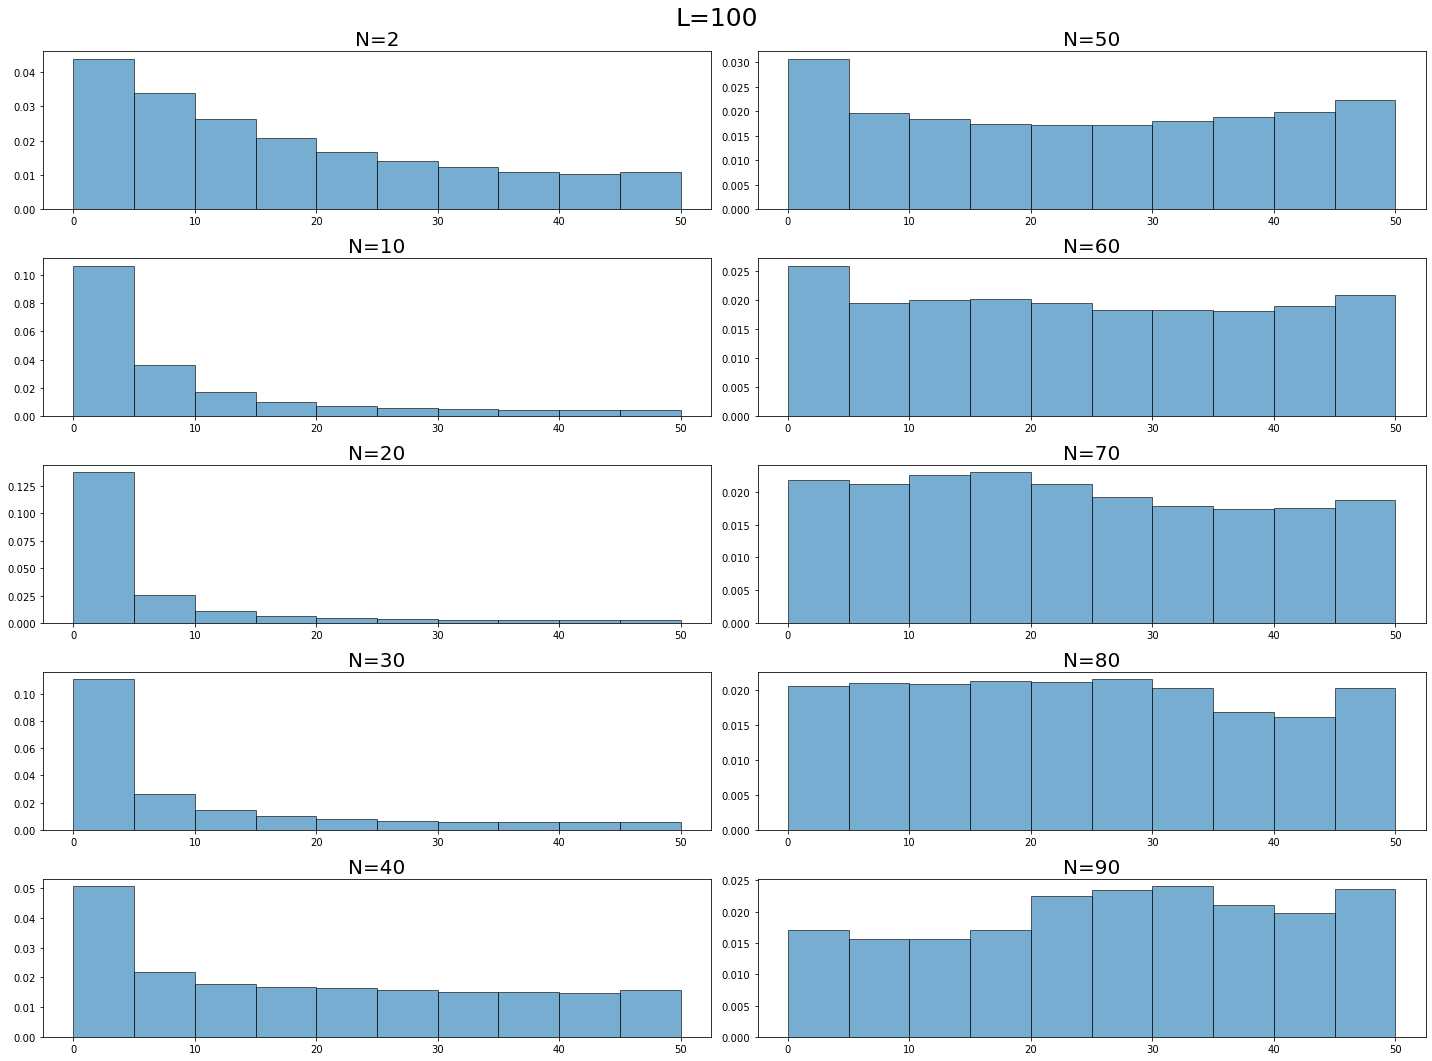

In [86]:
fig, ax = plt.subplots(5,2, tight_layout=True, figsize=(20,15))
style_dict = {'fontsize' : 20}
ax[0,0].hist(df_distance['2'], bins=10, histtype='barstacked', ec='black' ,density=True,alpha=0.6)
ax[1,0].hist(df_distance['10'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[2,0].hist(df_distance['20'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[3,0].hist(df_distance['30'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[4,0].hist(df_distance['40'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[0,1].hist(df_distance['50'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[1,1].hist(df_distance['60'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[2,1].hist(df_distance['70'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[3,1].hist(df_distance['80'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[4,1].hist(df_distance['90'], bins=10, histtype='barstacked', ec='black',density=True,alpha=0.6)
ax[0,0].set_title('N=2' ,fontdict=style_dict)
ax[1,0].set_title('N=10',fontdict=style_dict)
ax[2,0].set_title('N=20',fontdict=style_dict)
ax[3,0].set_title('N=30',fontdict=style_dict)
ax[4,0].set_title('N=40',fontdict=style_dict)
ax[0,1].set_title('N=50',fontdict=style_dict)
ax[1,1].set_title('N=60',fontdict=style_dict)
ax[2,1].set_title('N=70',fontdict=style_dict)
ax[3,1].set_title('N=80',fontdict=style_dict)
ax[4,1].set_title('N=90',fontdict=style_dict)
plt.suptitle('L=100',fontsize=25)
plt.show()

In [61]:
fig, ax = plt.subplots(5,2), tight_layout, figsize=(20,15)
ax1 = fig.add_subplot(521)
ax1.hist(df_distance['2'], bins=10, histtype='barstacked', ec='black',density=True)
ax2 = fig.add_subplot(523)
ax2 .hist(df_distance['10'], bins=10, histtype='barstacked', ec='black',density=True)
ax3 = fig.add_subplot(525)
ax3.hist(df_distance['20'], bins=10, histtype='barstacked', ec='black',density=True)
ax4 = fig.add_subplot(527)
ax4.hist(df_distance['30'], bins=10, histtype='barstacked', ec='black',density=True)
ax5 = fig.add_subplot(529)
ax5.hist(df_distance['40'], bins=10, histtype='barstacked', ec='black',density=True)
ax6 = fig.add_subplot(522)
ax6 .hist(df_distance['50'], bins=10, histtype='barstacked', ec='black',density=True)
ax7 = fig.add_subplot(524)
ax7.hist(df_distance['60'], bins=10, histtype='barstacked', ec='black',density=True)
ax8 = fig.add_subplot(526)
ax8.hist(df_distance['70'], bins=10, histtype='barstacked', ec='black',density=True)
ax9 = fig.add_subplot(528)
ax9.hist(df_distance['80'], bins=10, histtype='barstacked', ec='black',density=True)
ax10 = fig.add_subplot(5,2,10)
ax10 .hist(df_distance['90'], bins=10, histtype='barstacked', ec='black',density=True)
plt.legend()
plt.show()

AttributeError: 'Figure' object has no property 'sharex'

In [20]:
def xt_dt2vt(xt, dt):
    dx = xt.diff(dt)
    vt = dx/dt

    return(vt[dt:])

- $N=20$

In [21]:
var_vt_4 =    np.var(xt_dt2vt(d1['20'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['20'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['20'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['20'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['20'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['20'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['20'],1000))

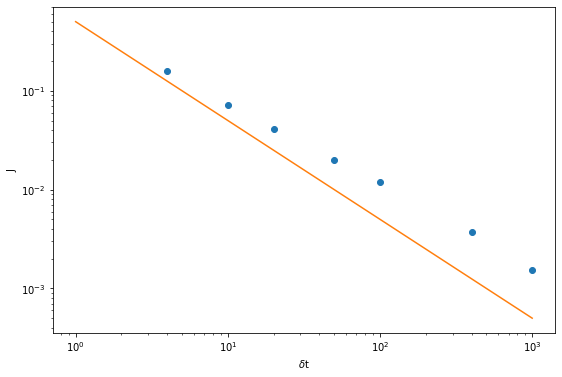

In [22]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=50$

In [23]:
var_vt_4 =    np.var(xt_dt2vt(d1['50'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['50'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['50'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['50'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['50'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['50'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['50'],1000))

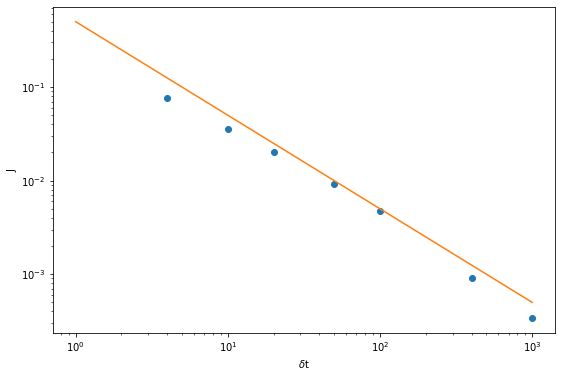

In [24]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=90$

In [25]:
var_vt_4 =    np.var(xt_dt2vt(d1['90'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['90'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['90'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['90'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['90'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['90'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['90'],1000))

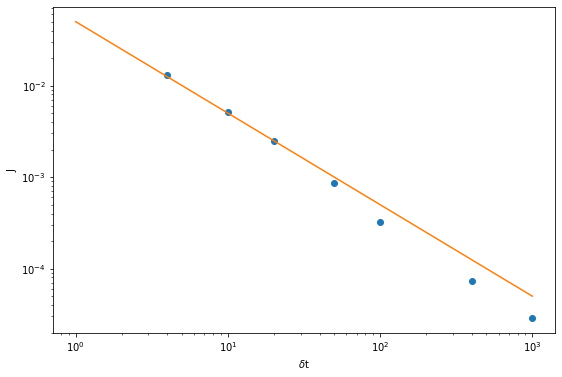

In [26]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.05/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

## Corr

In [27]:
def x01_dt2corr_v01(x0,x1,dt):
    dx0=x0.diff(dt)[dt:]
    dx1=x1.diff(dt)[dt:]
    corr=np.corrcoef(dx0,dx1)

    return(corr[0,1])

In [28]:
j='2'

In [29]:
x01_dt2corr_v01(d1[j],d2[j],2)

-0.30730984413669177

- $N=2$

In [30]:
j='2'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

In [31]:
corr_v_4

-0.3000233756859189

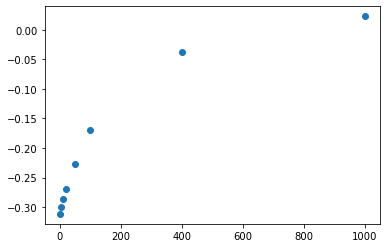

In [32]:
ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=5$

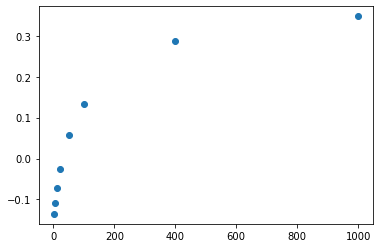

In [33]:
j='5'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=10$

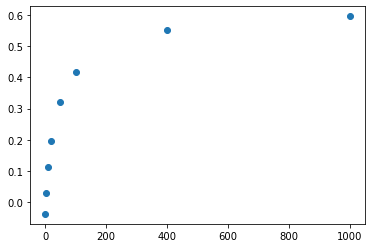

In [34]:
j='10'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=20$

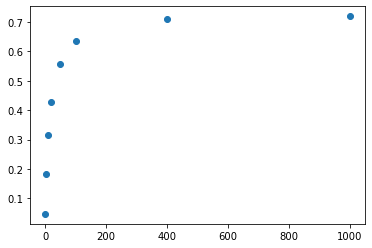

In [35]:
j='20'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=50$

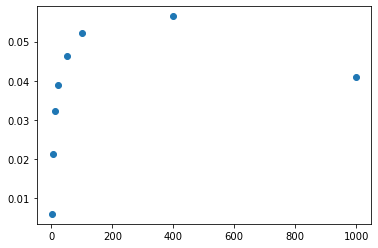

In [36]:
j='50'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=90$

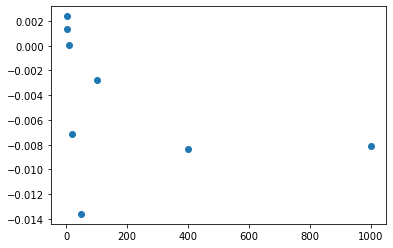

In [37]:
j='90'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

## Diffusion constant

In [38]:
def diffusion(xt, dt):
    dx = np.var(xt.diff(dt))
    diff = dx/dt

    return diff

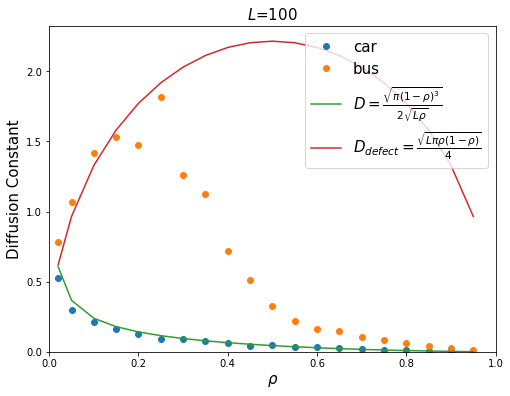

In [42]:
delta_y = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],4000)
    delta_y.append(d)

delta_x = []
for i in range(1,21):
    d = diffusion(d3.iloc[:,i],4000)
    delta_x.append(d)


b = 0.25
L = 100

plt.figure(figsize=(8,6))
plt.plot(rho, delta_x, linestyle='None', marker='o', label='car')
plt.plot(rho, delta_y, linestyle='None', marker='o', label='bus')
plt.plot(rho, np.sqrt(math.pi*np.power(1-rho,3)/(L*rho))/2, label=r'$D=\frac{\sqrt{\pi(1-\rho)^{3}}}{2\sqrt{L\rho}}$')
plt.plot(rho, np.sqrt(L*math.pi*(rho-np.square(rho)))/4, label=r'$D_{defect}=\frac{\sqrt{L\pi\rho(1-\rho)}}{4}$')
plt.xlim(0,1)
plt.ylim(0,)
plt.xlabel(r'$\rho$',fontsize=15)
plt.ylabel(r'Diffusion Constant',fontsize=15)
plt.title(r'$L$=100',fontsize=15)
plt.legend(fontsize=15, loc='upper right')
plt.savefig('L100.png', dpi=600)

plt.show()

In [38]:
delta_x

[0.6632897445911758,
 0.5115089839531319,
 0.300602548299795,
 0.22682670922851306,
 0.1734099005182808,
 0.13288330550448077,
 0.11875467370087339,
 0.09754765292349502,
 0.07995975458415577,
 0.06256178981377686,
 0.054066661421755265,
 0.04363592942257841,
 0.03753627958703437,
 0.029771562301804475,
 0.02273662308151468,
 0.017087877419608936,
 0.012297963173769137,
 0.008003942380559813,
 0.004479549432832977,
 0.0018713422958662616]

In [39]:
delta_y

[0.7348077089955362,
 1.05810073830406,
 1.3329217326294924,
 1.5703893380387208,
 1.5288207025956848,
 1.7062830182290156,
 1.4628244207594827,
 1.1905565555938824,
 0.7336560271827126,
 0.5204458394753899,
 0.3388934736111316,
 0.23379750762586643,
 0.1811464102584829,
 0.14667177201699058,
 0.10965301117968672,
 0.08341862417383139,
 0.06346797163648932,
 0.04429770234433246,
 0.028729555317467362,
 0.013690832301777018]